In [22]:
import pandas as pd 
import requests

In [23]:
url = 'https://en.wikipedia.org/wiki/BS_postcode_area'

#checking if the page exists 
page =  requests.get(url)

if page.status_code == 200:
    print("The page exists")
else:
    print("The page doesn't exist Error: {}".format(page.status_code))
    
tables = pd.read_html(url, header = 0)
tables[1].head()

The page exists


,Postcode district,Post town,Coverage,Local authority area(s)
0,BS0,BRISTOL,NaN,non-geographic[3][4]
1,BS1,BRISTOL,"Bristol city centre, Redcliffe",Bristol
2,BS2,BRISTOL,"Kingsdown, St Paul's, St Phillip's, St Agnes",Bristol
3,BS3,BRISTOL,"Bedminster, Southville, Bower Ashton, part of ...",Bristol
4,BS4,BRISTOL,"Brislington, Knowle, Knowle West, St Anne's, p...",Bristol


In [24]:
#creating the dataset of bristol.

df_bristol = tables[1].dropna(subset = ['Coverage'])
df_bristol = df_bristol[df_bristol['Post town']== 'BRISTOL']

In [25]:
#checking any null value
df_bristol[df_bristol['Coverage'].isna()]
print("This dataset has {} rows".format(df_bristol.shape[0]))
df_bristol

This dataset has 28 rows


,Postcode district,Post town,Coverage,Local authority area(s)
1,BS1,BRISTOL,"Bristol city centre, Redcliffe",Bristol
2,BS2,BRISTOL,"Kingsdown, St Paul's, St Phillip's, St Agnes",Bristol
3,BS3,BRISTOL,"Bedminster, Southville, Bower Ashton, part of ...",Bristol
4,BS4,BRISTOL,"Brislington, Knowle, Knowle West, St Anne's, p...",Bristol
5,BS5,BRISTOL,"Easton, St George, Redfield, Whitehall, Eastvi...",Bristol
6,BS6,BRISTOL,"Cotham, Redland, Montpelier, Westbury Park, St...",Bristol
7,BS7,BRISTOL,"Bishopston, Horfield, part of Filton, Lockleaz...","Bristol, South Gloucestershire"
8,BS8,BRISTOL,"Clifton, Failand, Hotwells, Leigh Woods","Bristol, North Somerset"
9,BS9,BRISTOL,"Coombe Dingle, Sneyd Park, Stoke Bishop, Westb...",Bristol
10,BS10,BRISTOL,"Brentry, Henbury, Southmead, part of Westbury ...",Bristol


In [26]:
url_coords = 'https://drive.google.com/uc?export=download&id=16s7RBGFttT42-keO2IR40_tU0zN-7DFO'
coords = pd.read_csv(url_coords)
coords.head()

,postcode,latitude,longitude
0,BS1,51.45309,-2.59300
1,BS10,51.50606,-2.60954
2,BS11,51.49672,-2.67425
3,BS13,51.41163,-2.61116
4,BS14,51.41278,-2.56084


In [27]:
#merging the coordinates with addresses 

df_bristol.rename(columns={'Postcode district': 'postcode'}, inplace = True)
df_bristol.rename(columns={'Local authority area(s)':'Area'},inplace =True)
merge_df = pd.merge(df_bristol,coords,on ='postcode')

merge_df.head()

,postcode,Post town,Coverage,Area,latitude,longitude
0,BS1,BRISTOL,"Bristol city centre, Redcliffe",Bristol,51.45309,-2.59300
1,BS2,BRISTOL,"Kingsdown, St Paul's, St Phillip's, St Agnes",Bristol,51.45945,-2.58013
2,BS3,BRISTOL,"Bedminster, Southville, Bower Ashton, part of ...",Bristol,51.43776,-2.60144
3,BS4,BRISTOL,"Brislington, Knowle, Knowle West, St Anne's, p...",Bristol,51.43437,-2.56111
4,BS5,BRISTOL,"Easton, St George, Redfield, Whitehall, Eastvi...",Bristol,51.46140,-2.54992


In [28]:
# checking is the data matches

merge_df[merge_df['postcode']=='BS13']

,postcode,Post town,Coverage,Area,latitude,longitude
10,BS13,BRISTOL,"Bedminster Down, Bishopsworth, Hartcliffe, Wit...",Bristol,51.41163,-2.61116


In [29]:
print('The dataset of bristol has {} postcodes'.format(merge_df.shape[0]))

The dataset of bristol has 27 postcodes


In [30]:
#getting the lat and lng for bristol 

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='bristol_explorer')
address = 'Bristol'
location = geolocator.geocode(address)
lat = location.latitude
lng = location.longitude

print('The lat and lon of Bristol are {} and {} accordingly'.format(lat,lng))

The lat and lon of Bristol are 51.4538022 and -2.5972985 accordingly


In [31]:
# Defining Foursquare credential 

CLIENT_ID = '5D0YPSQTC3BFZNN2FVN2YGD12SKWUS0G4HRLKVMKLHK4S1DO' # your Foursquare ID
CLIENT_SECRET = 'YDPHD2XQZTBZBLAYQDHSDM22EZWUPVWLJ3WTR0BWFYUUKGGA' # your Foursquare Secret
ACCESS_TOKEN = 'NINA1LFKQQVGVXSGL3BO3MO1K45TTHE02NOFA2C0KSWXTGDD' # your FourSquare Access Token
VERSION = '20180605'
LIMIT = 100

In [32]:
#function that return venues for each neighbohood
def getNearbyVenues(names, latitudes, longitudes, radius = 500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        #creating the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        #make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
        nearby_venues =  pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood',
                                'Neighborhood Latitude',
                                'Neighborhood Longitude',
                                'Venue',
                                'Venue Latitude',
                                'Venue Longitude',
                                'Venue Category']
    return(nearby_venues)

In [33]:
# Getting all venues for all neighborhood in the dataset

bristol_venues = getNearbyVenues(names=merge_df['Coverage'],
                                 latitudes=merge_df['latitude'],
                                 longitudes=merge_df['longitude'])

Bristol city centre, Redcliffe
Kingsdown, St Paul's, St Phillip's, St Agnes
Bedminster, Southville, Bower Ashton, part of Totterdown, Windmill Hill
Brislington, Knowle, Knowle West, St Anne's, part of Totterdown
Easton, St George, Redfield, Whitehall, Eastville, Speedwell, Greenbank, Barton Hill
Cotham, Redland, Montpelier, Westbury Park, St. Andrew's
Bishopston, Horfield, part of Filton, Lockleaze, Ashley Down,
Clifton, Failand, Hotwells, Leigh Woods
Brentry, Henbury, Southmead, part of Westbury on Trym,
Avonmouth, Shirehampton, Lawrence Weston
Bedminster Down, Bishopsworth, Hartcliffe, Withywood, Headley Park
Hengrove, Stockwood, Whitchurch,
Hanham, Kingswood
Downend, Emersons Green, Fishponds, Frenchay, Pucklechurch, Staple Hill
Pill, Portishead
Bitton, Longwell Green, Cadbury Heath, Oldland Common, Warmley, Wick
Chewton Keynsham, Keynsham, Saltford
Almondsbury, Bradley Stoke
Part of Filton, Little Stoke, Patchway, Stoke Gifford
Alveston, Rudgeway, Severn Beach, Pilning, Thornbury
F

In [34]:
bristol_venues.shape

(332, 7)

In [35]:
bristol_venues.head(90)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Bristol city centre, Redcliffe",51.45309,-2.593,Small Bar,51.451791,-2.594948,Pub
1,"Bristol city centre, Redcliffe",51.45309,-2.593,BrewDog Bristol,51.453659,-2.592372,Beer Bar
2,"Bristol city centre, Redcliffe",51.45309,-2.593,Small Street Espresso,51.454766,-2.594400,Coffee Shop
3,"Bristol city centre, Redcliffe",51.45309,-2.593,St. Nicholas Market,51.454248,-2.593286,Market
4,"Bristol city centre, Redcliffe",51.45309,-2.593,Eatchu,51.453325,-2.594141,Japanese Restaurant
...,...,...,...,...,...,...,...
85,"Bristol city centre, Redcliffe",51.45309,-2.593,El Puerto,51.449485,-2.596547,Tapas Restaurant
86,"Bristol city centre, Redcliffe",51.45309,-2.593,Phoenix Cafe,51.456056,-2.591903,Café
87,"Bristol city centre, Redcliffe",51.45309,-2.593,Brigstow Cafe,51.453685,-2.596449,Café
88,"Bristol city centre, Redcliffe",51.45309,-2.593,Smoke & Mirrors,51.452898,-2.598887,Bar


In [36]:
bristol_venues.groupby('Neighborhood').count().loc[:,'Venue'].to_frame().rename(columns={'Venue':'Number of venues'})


,Number of venues
Neighborhood,
"Almondsbury, Bradley Stoke",10
"Avonmouth, Shirehampton, Lawrence Weston",4
"Backwell, Nailsea",2
"Bedminster Down, Bishopsworth, Hartcliffe, Withywood, Headley Park",5
"Bedminster, Southville, Bower Ashton, part of Totterdown, Windmill Hill",13
"Bishopston, Horfield, part of Filton, Lockleaze, Ashley Down,",12
"Bitton, Longwell Green, Cadbury Heath, Oldland Common, Warmley, Wick",6
"Brentry, Henbury, Southmead, part of Westbury on Trym,",3
"Brislington, Knowle, Knowle West, St Anne's, part of Totterdown",5


In [37]:
grouped_graph = bristol_venues.groupby('Neighborhood').count().loc[:,'Venue'].to_frame().rename(columns={'Venue':'Number of venues'})

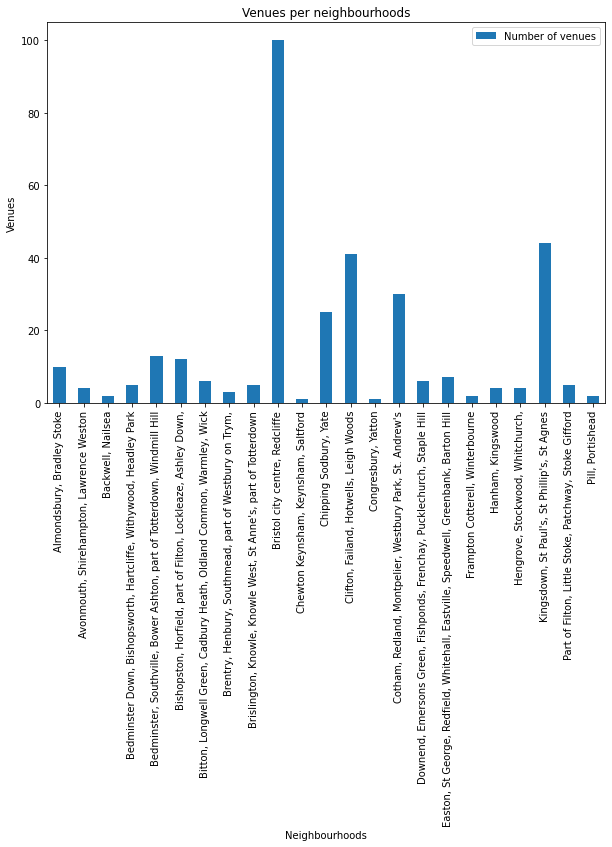

In [38]:
#Plotting the number of venues per neighbourhoods. 

import matplotlib as mpl
import matplotlib.pyplot as plt 

#neigh = list(map(str,grouped_graph.loc[:,'Neighborhood']))
#grouped_values = [grouped_graph['Number of venues'][i] for i in range(grouped_graph.shape[0])]
#grouped_values
#neigh = grouped_graph.index.tolist()

#graph_data = pd.dataFrma([grouped_values,neigh])
grouped_graph.plot(kind ='bar', figsize = (10,7))
plt.title('Venues per neighbourhoods')
plt.xlabel('Neighbourhoods')
plt.ylabel('Venues')
plt.show()

In [39]:
bristol_venues['Venue Category'].unique()[:100]
#print('How many night clubs there are {}'.format(len(bristol_venues[bristol_venues['Venue Category'].isin(['Vietnamese Restaurant','Japanese Restaurant'])])))

array(['Pub', 'Beer Bar', 'Coffee Shop', 'Market', 'Japanese Restaurant',
       'Theater', 'Middle Eastern Restaurant', 'Burger Joint',
       'Falafel Restaurant', 'Jazz Club', 'Italian Restaurant',
       'Vietnamese Restaurant', 'Lounge', 'Steakhouse', 'Café', 'Bar',
       'Asian Restaurant', 'Korean Restaurant', 'Pie Shop', 'Hookah Bar',
       'Indian Restaurant', 'Park', 'Breakfast Spot',
       'Indie Movie Theater', 'Pizza Place', 'Record Shop',
       'Concert Hall', 'Art Gallery', 'Cocktail Bar', 'Ice Cream Shop',
       'Tapas Restaurant', 'Seafood Restaurant', 'English Restaurant',
       'Restaurant', 'Caribbean Restaurant', 'Frozen Yogurt Shop',
       'Hotel', 'Music Venue', 'Greek Restaurant', 'Bookstore',
       'Gastropub', 'Chinese Restaurant', 'Bowling Alley',
       'Grocery Store', 'Sandwich Place', 'Clothing Store', 'Road',
       'Furniture / Home Store', 'Shopping Mall', 'Portuguese Restaurant',
       'Gay Bar', 'French Restaurant', 'American Restaurant', 'G

In [40]:
# one hot encoding 

to_onehot = pd.get_dummies(bristol_venues[['Venue Category']], prefix="", prefix_sep="")

to_onehot['Neighborhood'] = bristol_venues['Neighborhood']

fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]


print(to_onehot.shape)
to_onehot.head()

(332, 104)


,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,...,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar
0,"Bristol city centre, Redcliffe",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Bristol city centre, Redcliffe",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"Bristol city centre, Redcliffe",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Bristol city centre, Redcliffe",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bristol city centre, Redcliffe",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Group by neighborhoods and take the mean of frequency occorrence of each category 

grouped_df = to_onehot.groupby("Neighborhood").mean().reset_index()
grouped_df

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,...,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar
0,"Almondsbury, Bradley Stoke",0.000000,0.00,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
1,"Avonmouth, Shirehampton, Lawrence Weston",0.000000,0.00,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
2,"Backwell, Nailsea",0.000000,0.00,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
3,"Bedminster Down, Bishopsworth, Hartcliffe, Wit...",0.000000,0.00,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
4,"Bedminster, Southville, Bower Ashton, part of ...",0.000000,0.00,0.00000,0.000000,0.0,0.000000,0.000000,0.153846,0.00,...,0.000000,0.00000,0.076923,0.00000,0.076923,0.000000,0.076923,0.00,0.00,0.000000
5,"Bishopston, Horfield, part of Filton, Lockleaz...",0.000000,0.00,0.00000,0.000000,0.0,0.083333,0.083333,0.000000,0.00,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
6,"Bitton, Longwell Green, Cadbury Heath, Oldland...",0.000000,0.00,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.166667,0.000000,0.00,0.00,0.000000
7,"Brentry, Henbury, Southmead, part of Westbury ...",0.000000,0.00,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
8,"Brislington, Knowle, Knowle West, St Anne's, p...",0.000000,0.00,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.000000
9,"Bristol city centre, Redcliffe",0.000000,0.01,0.00000,0.020000,0.0,0.000000,0.000000,0.100000,0.01,...,0.000000,0.02000,0.000000,0.02000,0.000000,0.000000,0.000000,0.01,0.00,0.000000


In [42]:
#print each neighborhood with the top 5 most common venues

len(grouped_df[grouped_df['Bar'] > 0])

5

In [43]:
bars = grouped_df[['Neighborhood','Bar']]
bars.head()

,Neighborhood,Bar
0,"Almondsbury, Bradley Stoke",0.000000
1,"Avonmouth, Shirehampton, Lawrence Weston",0.000000
2,"Backwell, Nailsea",0.000000
3,"Bedminster Down, Bishopsworth, Hartcliffe, Wit...",0.000000
4,"Bedminster, Southville, Bower Ashton, part of ...",0.153846


In [46]:
# Custering Neighborhoods 
from sklearn.cluster import KMeans

cluster = bars.drop(['Neighborhood'],1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster)
    distortions.append(kmeanModel.inertia_)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.


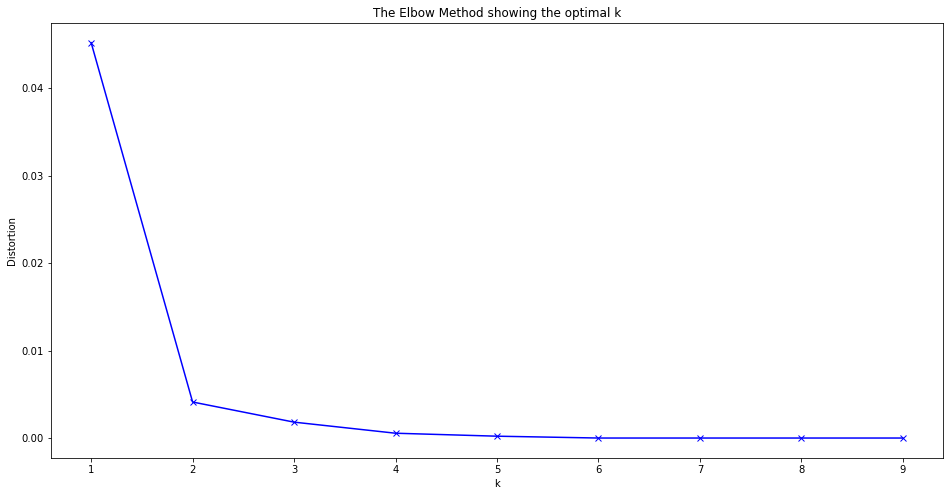

In [47]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [48]:
# Custering Neighborhoods 

nclusters = 3

#run k-means clustering
kmeans = KMeans(n_clusters = nclusters, random_state=0).fit(cluster)

kmeans.labels_[0:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int32)

In [49]:
merged_df = bars.copy()

merged_df['Cluster labels'] = kmeans.labels_
merged_df.head()

,Neighborhood,Bar,Cluster labels
0,"Almondsbury, Bradley Stoke",0.000000,0
1,"Avonmouth, Shirehampton, Lawrence Weston",0.000000,0
2,"Backwell, Nailsea",0.000000,0
3,"Bedminster Down, Bishopsworth, Hartcliffe, Wit...",0.000000,0
4,"Bedminster, Southville, Bower Ashton, part of ...",0.153846,1


In [50]:
# merge with the dataset that contains the coordinates 
merged_df = merged_df.join(bristol_venues.set_index('Neighborhood'), on = 'Neighborhood')


In [51]:
merged_df.head()

,Neighborhood,Bar,Cluster labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Almondsbury, Bradley Stoke",0.0,0,51.54228,-2.55955,Aldi,51.541592,-2.558311,Supermarket
0,"Almondsbury, Bradley Stoke",0.0,0,51.54228,-2.55955,The Hollow Tree,51.541032,-2.559693,Restaurant
0,"Almondsbury, Bradley Stoke",0.0,0,51.54228,-2.55955,Tesco Express,51.543001,-2.558634,Grocery Store
0,"Almondsbury, Bradley Stoke",0.0,0,51.54228,-2.55955,Brunel's Hat Restaurant,51.544345,-2.565439,Restaurant
0,"Almondsbury, Bradley Stoke",0.0,0,51.54228,-2.55955,Pizza Hut,51.541697,-2.558173,Pizza Place


In [52]:
# Mapping the clusters 
!pip install --quiet folium 

import matplotlib.colors as colors 
import matplotlib.cm as cm 
import numpy as np
import folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [53]:
#Map
map_clusters = folium.Map(location =[lat,lng], zoom_start=10)

#set color schema
x = np.arange(nclusters)
ys = [i+x+(i*x)**2 for i in range(nclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [54]:
# add markers 
for lat,lon,nb,cluster in zip(merged_df['Neighborhood Latitude'], merged_df['Neighborhood Longitude'], merged_df['Neighborhood'], merged_df['Cluster labels']):
    label = folium.Popup(str(nb)+' - Cluster '+ str(cluster))
    folium.CircleMarker(
    [lat,lon],
    radius = 5,
    popup=label,
    color=rainbow[cluster-1],
    fill_color=rainbow[cluster-1],
    fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [116]:
# save the map
map_clusters.save('map_clusters.html')

In [159]:
#Exploring the clusters for better understanding 
cluster_one = merged_df.loc[merged_df['Cluster labels'] == 1]
cluster_one[cluster_one['Venue Category']=='Bar']

,Neighborhood,Bar,Cluster labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
9,"Bristol city centre, Redcliffe",0.100000,1,51.45309,-2.59300,Kongs of King Street,51.451793,-2.594344,Bar
9,"Bristol city centre, Redcliffe",0.100000,1,51.45309,-2.59300,Strawberry Thief,51.455710,-2.594596,Bar
9,"Bristol city centre, Redcliffe",0.100000,1,51.45309,-2.59300,The Apple,51.451938,-2.592408,Bar
9,"Bristol city centre, Redcliffe",0.100000,1,51.45309,-2.59300,The Rummer Hotel,51.454308,-2.593081,Bar
9,"Bristol city centre, Redcliffe",0.100000,1,51.45309,-2.59300,The Christmas Steps,51.455979,-2.596378,Bar
9,"Bristol city centre, Redcliffe",0.100000,1,51.45309,-2.59300,No.1 Harbourside,51.452087,-2.597635,Bar
9,"Bristol city centre, Redcliffe",0.100000,1,51.45309,-2.59300,Under The Stars,51.451890,-2.597534,Bar
9,"Bristol city centre, Redcliffe",0.100000,1,51.45309,-2.59300,Horts,51.455595,-2.594004,Bar
9,"Bristol city centre, Redcliffe",0.100000,1,51.45309,-2.59300,Shore Bar,51.450113,-2.597490,Bar
9,"Bristol city centre, Redcliffe",0.100000,1,51.45309,-2.59300,Smoke & Mirrors,51.452898,-2.598887,Bar


In [160]:
cluster_zero = merged_df.loc[merged_df['Cluster labels'] == 0]
cluster_zero[cluster_zero['Venue Category']=='Bar']

,Neighborhood,Bar,Cluster labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
12,"Clifton, Failand, Hotwells, Leigh Woods",0.052632,0,51.45745,-2.62041,The Clifton,51.454132,-2.618075,Bar
12,"Clifton, Failand, Hotwells, Leigh Woods",0.052632,0,51.45745,-2.62041,Amoeba,51.455517,-2.618790,Bar
19,"Kingsdown, St Paul's, St Phillip's, St Agnes",0.023256,0,51.45945,-2.58013,The Old Market Assembly,51.456784,-2.579021,Bar


In [161]:
cluster_two = merged_df.loc[merged_df['Cluster labels'] == 2]
cluster_two[cluster_two['Venue Category']=='Bar']

,Neighborhood,Bar,Cluster labels,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,"Bedminster, Southville, Bower Ashton, part of ...",0.181818,2,51.43776,-2.60144,The Old Bookshop,51.440796,-2.604461,Bar
4,"Bedminster, Southville, Bower Ashton, part of ...",0.181818,2,51.43776,-2.60144,North Street Standard,51.441263,-2.602274,Bar
